# Aim: Exploratory Data Analysis on e-commerce sales data. 

An in-depth look at the profitability of e-commerce sales in Amazon in the month of June.
Using this dataset, one can measure the performance of their campaigns more accurately and efficiently.
Phase 2 steps include:
 - importing the data
 - understanding the data
 - standardising the column names
 - standardising data
 - handling missing data
 - deleting duplicate values

### Importing data

In [1]:
import pandas as pd

# Load CSV file
df = pd.read_csv("Raw_Data_Sales.csv")

### Understanding the data
Reading first 5 rows data to understand the data

In [2]:
print(df.head())

    index             Order ID      Date                        Status  \
0  107178  171-1300198-0807551  06-15-22                       Shipped   
1  107179  403-9348415-4677108  06-15-22                       Shipped   
2  107180  171-2810368-4915523  06-15-22                       Shipped   
3  107181  404-1453112-7449163  06-15-22                       Shipped   
4  107182  402-9825296-6526720  06-15-22  Shipped - Delivered to Buyer   

  Fulfilment Sales Channel ship-service-level    Style             SKU  \
0     Amazon     Amazon.in          Expedited  JNE3801  JNE3801-KR-XXL   
1     Amazon     Amazon.in          Expedited    J0336      J0336-TP-M   
2     Amazon     Amazon.in          Expedited  MEN5021   MEN5021-KR-XL   
3     Amazon     Amazon.in          Expedited  JNE3786  JNE3786-KR-XXL   
4   Merchant     Amazon.in           Standard    J0306    J0306-DR-XXL   

        Category  ... currency  Amount      ship-city      ship-state  \
0          kurta  ...      INR   735.

To find the number of rows and columns of data loaded

In [3]:
# Number of rows and columns
print("Shape (rows, columns):", df.shape)

# Number of rows only
print("Rows:", len(df))

# Number of columns only
print("Columns:", len(df.columns))

Shape (rows, columns): (18601, 24)
Rows: 18601
Columns: 24


To find data types of columns

In [4]:
print("\nData Types:")
print(df.dtypes)


Data Types:
index                   int64
Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Style                  object
SKU                    object
Category               object
Size                   object
ASIN                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code      float64
ship-country           object
promotion-ids          object
B2B                      bool
fulfilled-by           object
Unnamed: 22              bool
dtype: object


### Standardising the column names

Updating column names to proper title. Also, replacing hyphens in column names

In [5]:
df.columns = df.columns.str.replace('-', ' ').str.title()

Displaying the list of column names

In [6]:
# Print the column names
print(df.columns)

Index(['Index', 'Order Id', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'Ship Service Level', 'Style', 'Sku', 'Category', 'Size', 'Asin',
       'Courier Status', 'Qty', 'Currency', 'Amount', 'Ship City',
       'Ship State', 'Ship Postal Code', 'Ship Country', 'Promotion Ids',
       'B2B', 'Fulfilled By', 'Unnamed: 22'],
      dtype='object')


### Handling missing values

To find number of number of number of null values in each column

In [7]:
nan_counts_all_cols = df.isnull().sum()
print("\nNumber of NaN values per column:")
print(nan_counts_all_cols)


Number of NaN values per column:
Index                     0
Order Id                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
Ship Service Level        0
Style                     0
Sku                       0
Category                  0
Size                      0
Asin                      0
Courier Status            0
Qty                       0
Currency                 17
Amount                   17
Ship City                 5
Ship State                5
Ship Postal Code          5
Ship Country              5
Promotion Ids          6140
B2B                       0
Fulfilled By          14245
Unnamed: 22               0
dtype: int64


### Standardising data

To correct data type of Date column and Index
Also, removing columns 'Unnamed:22 and fulfilled-by' as it is irrelevant or has a lot of null data

In [8]:
# Correcting the data type of date
df['Date'] = pd.to_datetime(df['Date'])

# Dropping column 'Unnamed:22 and fulfilled-by' as it is irrelevant or has a lot of null data
columns_to_drop = ['Unnamed: 22', 'Fulfilled By']
df_new = df.drop(columns=columns_to_drop)
df=df_new

df['Index'] = df['Index'].astype('string')

Where promotion ids is not applied, the data had value 'Null'. Changing this to 'None'

In [9]:
#Assigning value 'None' where promotion-ids is Null
df['Promotion Ids'] = df['Promotion Ids'].fillna(value='None')

### Handling missing values

Checking if any columns contain Null values

In [10]:
nan_counts_all_cols = df.isnull().sum()
print("\nNumber of NaN values per column:")
print(nan_counts_all_cols)


Number of NaN values per column:
Index                  0
Order Id               0
Date                   0
Status                 0
Fulfilment             0
Sales Channel          0
Ship Service Level     0
Style                  0
Sku                    0
Category               0
Size                   0
Asin                   0
Courier Status         0
Qty                    0
Currency              17
Amount                17
Ship City              5
Ship State             5
Ship Postal Code       5
Ship Country           5
Promotion Ids          0
B2B                    0
dtype: int64


Deleting all rows that contain any null values and again checking for null values.

In [11]:
df_new = df.dropna() 
df=df_new
nan_counts_all_cols = df.isnull().sum()
print("\nNumber of NaN values per column:")
print(nan_counts_all_cols)


Number of NaN values per column:
Index                 0
Order Id              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
Ship Service Level    0
Style                 0
Sku                   0
Category              0
Size                  0
Asin                  0
Courier Status        0
Qty                   0
Currency              0
Amount                0
Ship City             0
Ship State            0
Ship Postal Code      0
Ship Country          0
Promotion Ids         0
B2B                   0
dtype: int64


### Standardising data in date column

Changing float data type to string to correct the data type

In [12]:
# to drop the decimal places in float data type and then convert to string
df['Ship Postal Code'] = df['Ship Postal Code'].astype(int)

df['Ship Postal Code'] = df['Ship Postal Code'].astype(str)

In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18579 entries, 0 to 18600
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Index               18579 non-null  string        
 1   Order Id            18579 non-null  object        
 2   Date                18579 non-null  datetime64[ns]
 3   Status              18579 non-null  object        
 4   Fulfilment          18579 non-null  object        
 5   Sales Channel       18579 non-null  object        
 6   Ship Service Level  18579 non-null  object        
 7   Style               18579 non-null  object        
 8   Sku                 18579 non-null  object        
 9   Category            18579 non-null  object        
 10  Size                18579 non-null  object        
 11  Asin                18579 non-null  object        
 12  Courier Status      18579 non-null  object        
 13  Qty                 18579 non-null  int64     

### Deleting duplicate rows

In [14]:
#Dropping duplicate rows
df_unique = df.drop_duplicates()
df=df_unique

### Checking final data

In [15]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18579 entries, 0 to 18600
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Index               18579 non-null  string        
 1   Order Id            18579 non-null  object        
 2   Date                18579 non-null  datetime64[ns]
 3   Status              18579 non-null  object        
 4   Fulfilment          18579 non-null  object        
 5   Sales Channel       18579 non-null  object        
 6   Ship Service Level  18579 non-null  object        
 7   Style               18579 non-null  object        
 8   Sku                 18579 non-null  object        
 9   Category            18579 non-null  object        
 10  Size                18579 non-null  object        
 11  Asin                18579 non-null  object        
 12  Courier Status      18579 non-null  object        
 13  Qty                 18579 non-null  int64     

No duplicate data was found and hence none deleted.

In [16]:
print(df.describe())

                Qty        Amount
count  18579.000000  18579.000000
mean       1.003983    661.023467
std        0.078233    289.808217
min        1.000000      0.000000
25%        1.000000    457.000000
50%        1.000000    635.000000
75%        1.000000    788.000000
max        5.000000   2894.000000


In [17]:
print(df.head())

    Index             Order Id       Date                        Status  \
0  107178  171-1300198-0807551 2022-06-15                       Shipped   
1  107179  403-9348415-4677108 2022-06-15                       Shipped   
2  107180  171-2810368-4915523 2022-06-15                       Shipped   
3  107181  404-1453112-7449163 2022-06-15                       Shipped   
4  107182  402-9825296-6526720 2022-06-15  Shipped - Delivered to Buyer   

  Fulfilment Sales Channel Ship Service Level    Style             Sku  \
0     Amazon     Amazon.in          Expedited  JNE3801  JNE3801-KR-XXL   
1     Amazon     Amazon.in          Expedited    J0336      J0336-TP-M   
2     Amazon     Amazon.in          Expedited  MEN5021   MEN5021-KR-XL   
3     Amazon     Amazon.in          Expedited  JNE3786  JNE3786-KR-XXL   
4   Merchant     Amazon.in           Standard    J0306    J0306-DR-XXL   

        Category  ... Courier Status Qty Currency  Amount      Ship City  \
0          kurta  ...       

Updating data in 'ship-city','ship-state' and 'Category' so that data is proper. 

Checking data types to verify

In [18]:
df['Ship City'] = df['Ship City'].str.title()
df['Ship State'] = df['Ship State'].str.title()
df['Category'] = df['Category'].str.title()

print(df.head())
print(df.dtypes)

    Index             Order Id       Date                        Status  \
0  107178  171-1300198-0807551 2022-06-15                       Shipped   
1  107179  403-9348415-4677108 2022-06-15                       Shipped   
2  107180  171-2810368-4915523 2022-06-15                       Shipped   
3  107181  404-1453112-7449163 2022-06-15                       Shipped   
4  107182  402-9825296-6526720 2022-06-15  Shipped - Delivered to Buyer   

  Fulfilment Sales Channel Ship Service Level    Style             Sku  \
0     Amazon     Amazon.in          Expedited  JNE3801  JNE3801-KR-XXL   
1     Amazon     Amazon.in          Expedited    J0336      J0336-TP-M   
2     Amazon     Amazon.in          Expedited  MEN5021   MEN5021-KR-XL   
3     Amazon     Amazon.in          Expedited  JNE3786  JNE3786-KR-XXL   
4   Merchant     Amazon.in           Standard    J0306    J0306-DR-XXL   

        Category  ... Courier Status Qty Currency  Amount      Ship City  \
0          Kurta  ...       

Exporting the data to csv file

In [19]:
df.to_csv('ECommerce_Project_Phase2.csv', index=False)

### Status:
    During Data cleaning, 22 rows were deleted as they had missing values. 
    Also, 2 columns were deleted because they were unnecessary. Also, standardised the column names and data.


# Exploratory Data Analysis and Visualisation

For Exploratory Data Analysis, we need to handle outliers, perform univariate analysis, bivariate analysis and multivariate analysis,
and visualize the same to find insights into the data.

### Importing libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Univariate Analysis

To understand the factors that have contributed to the sales. Also, to understand product distribution, 



To find the cities with top sales.

Insight: Top 2 cities are: Bengaluru and Hyderabad. Even though Bengaluru and Hyderabad are the cities with top sales,  they contribute to only 18% of the total sales.

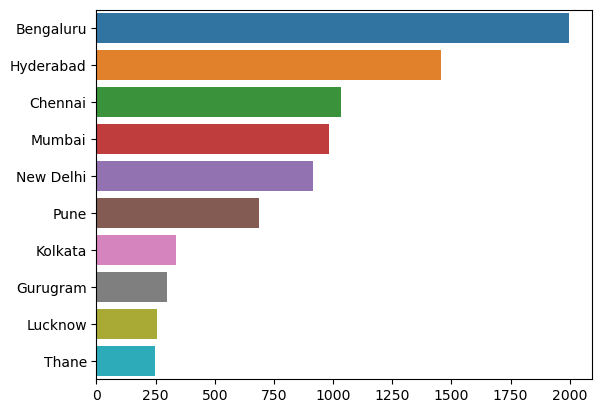

In [21]:
top_10_cities = df["Ship City"].value_counts().head(10)

sns.barplot(x=top_10_cities.values, y=top_10_cities.index)
plt.show()


In [22]:
selected = ['Bengaluru', 'Hyderabad']
df['BorH'] = np.where(df['Ship City'].isin(selected), 'yes', 'no')
percentages = df['BorH'].value_counts(normalize=True) * 100
print("\nPercentages:")
print(percentages)


Percentages:
no     81.430648
yes    18.569352
Name: BorH, dtype: float64


To find outliers, here, to find higher amount orders and also find the average range.

Insight: The average range of amount of orders (8327) lie between Rs. 450 and Rs.750 approx. 
         There are 5687 orders (30%) wherein the orders were above Rs. 750.

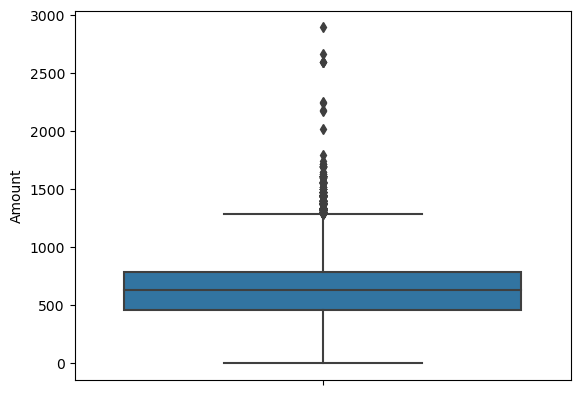

In [23]:
sns.boxplot(y=df['Amount'])
plt.show()

In [24]:
# Orders with amount between 450 and 750 (inclusive of 750)
count_between_450_and_750 = df[(df['Amount'] >= 450) & (df['Amount'] <= 750)].shape[0]

# Count orders with amount more than 750
count_more_than_750 = df[df['Amount'] > 750].shape[0]

print(f"Number of orders with amount between 450 and 750: {count_between_450_and_750}")
print(f"Number of orders with amount more than 750: {count_more_than_750}")

Number of orders with amount between 450 and 750: 8327
Number of orders with amount more than 750: 5687


To find the category of product that has sold more in the said weeks.

Insight: We can infer that the top 3 selling products are Kurtas, Set and Western Dresses. 
         They contribute to 91% of the total sales.

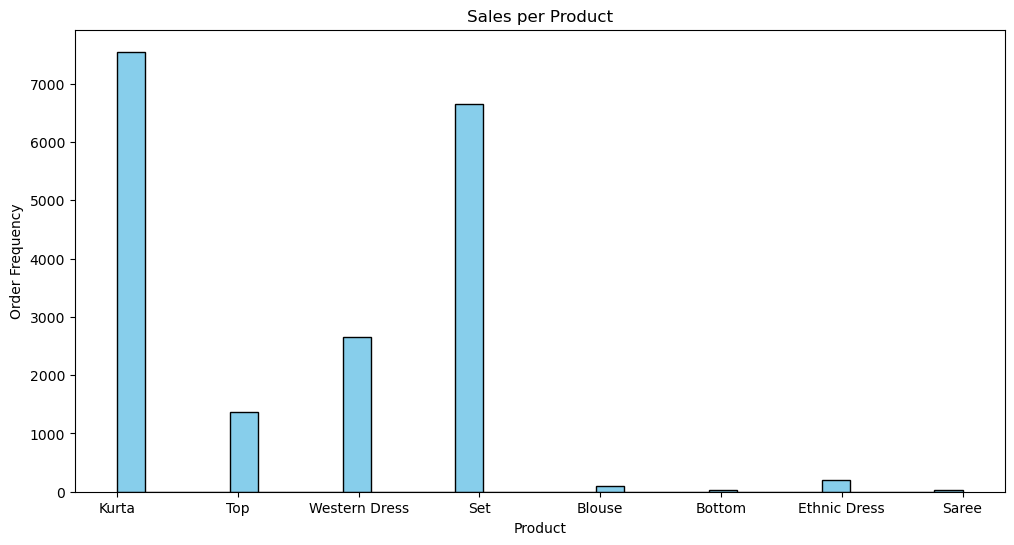

In [25]:
plt.figure(figsize=(12, 6))
plt.hist(df['Category'], bins=30, color='skyblue', edgecolor='black')
plt.title('Sales per Product')
plt.xlabel('Product')
plt.ylabel('Order Frequency')
plt.show()

In [34]:
#find percentage of top 3 selling products
selected = ['Kurta', 'Set','Western Dress']
df['KurtaOrSet'] = np.where(df['Category'].isin(selected), 'yes', 'no')
percentages = df['KurtaOrSet'].value_counts(normalize=True) * 100
print("\nPercentages:")
print(percentages)

# Defining the reference date
reference_date = pd.to_datetime('2022-06-15')

# Calculate the difference in days
df['days_diff'] = (reference_date - df['Date']).dt.days

df['Delivery Status'] = 'On time' 

df.loc[(df['days_diff'] > 7) & (df['Status'] == 'Shipped'), 'Delivery Status'] = 'Not delivered on time'

#days_diff column not required
#df = df.drop(columns=['days_diff'])

print(df.head())

percentages = df['Delivery Status'].value_counts(normalize=True) * 100
print("\nPercentages:")
print(percentages)


Percentages:
yes    90.79606
no      9.20394
Name: KurtaOrSet, dtype: float64
    Index             Order Id       Date                        Status  \
0  107178  171-1300198-0807551 2022-06-15                       Shipped   
1  107179  403-9348415-4677108 2022-06-15                       Shipped   
2  107180  171-2810368-4915523 2022-06-15                       Shipped   
3  107181  404-1453112-7449163 2022-06-15                       Shipped   
4  107182  402-9825296-6526720 2022-06-15  Shipped - Delivered to Buyer   

  Fulfilment Sales Channel Ship Service Level    Style             Sku  \
0     Amazon     Amazon.in          Expedited  JNE3801  JNE3801-KR-XXL   
1     Amazon     Amazon.in          Expedited    J0336      J0336-TP-M   
2     Amazon     Amazon.in          Expedited  MEN5021   MEN5021-KR-XL   
3     Amazon     Amazon.in          Expedited  JNE3786  JNE3786-KR-XXL   
4   Merchant     Amazon.in           Standard    J0306    J0306-DR-XXL   

        Category  ...    

To find the delivery status of ordered products
Insight: 77% of the orders are yet to be delivered and are in transit.
         36% of orders have failed to meet the delivery deadline.
         22% of the orders have been delivered.
         Approximately 1% is being returned to seller.

C:\Users\Admin\AppData\Local\Temp\ipykernel_13748\381726725.py:7: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(wedges, labels=status_counts.index, title="Status", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))


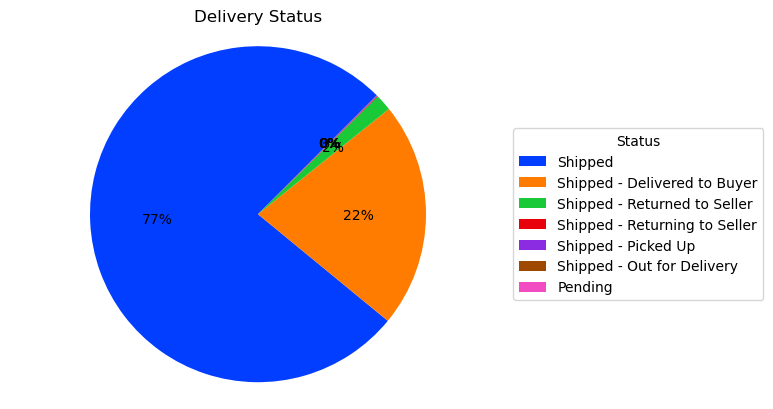

In [35]:
status_counts = df['Status'].value_counts()
colors = sns.color_palette('bright')
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(status_counts,colors=colors, startangle=45, autopct='%.f%%')

# Creating legend
ax.legend(wedges, labels=status_counts.index, title="Status", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
ax.set_title('Delivery Status')
ax.axis('equal')

plt.show()

### Bivariate Analysis

To understand the sales trend
Insight: The sales tends to average at around Rs.818000, however it must be noted that that the sales takes significant dips on Fridays but picks up over the weekends.

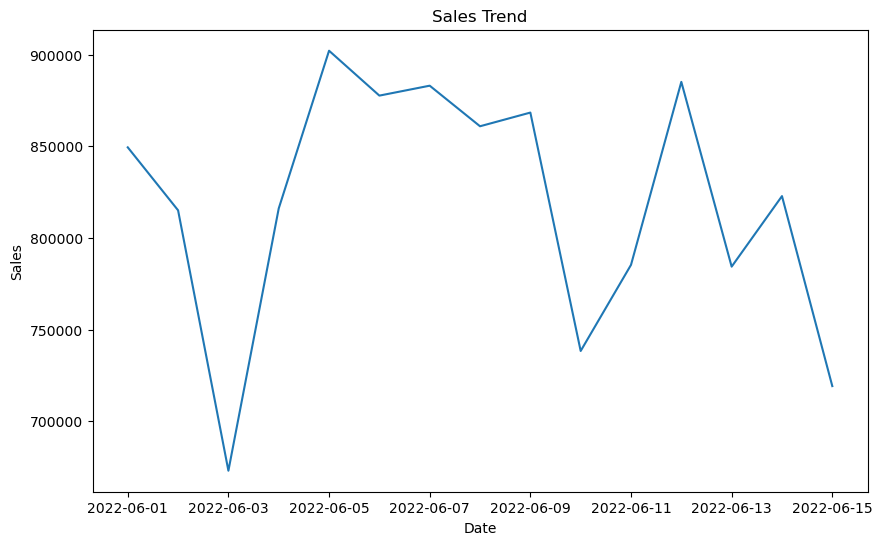


Mean of Amount': 818743.6666666666


In [36]:
plt.figure(figsize=(10, 6)) 
new_df = df.groupby(['Date'])['Amount'].sum().reset_index()
sns.lineplot(x='Date', y='Amount', data=new_df, errorbar=None)
plt.title("Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()
mean_of_amount = new_df['Amount'].mean()
print(f"\nMean of Amount': {mean_of_amount}")

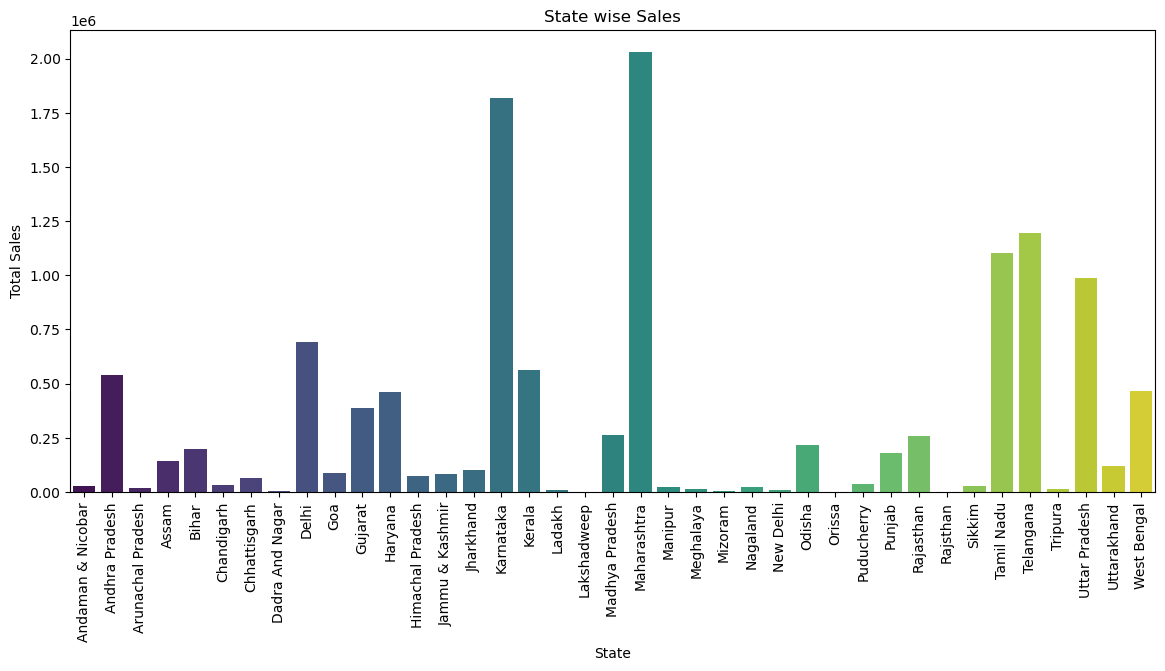

In [37]:
#to get sum of sales in each state
state_sales = df.groupby('Ship State')['Amount'].sum().reset_index()
plt.figure(figsize=(14, 6))
#print(state_sales)
sns.barplot(data=state_sales, x='Ship State', y='Amount', palette='viridis')
plt.title('State wise Sales')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)

plt.show()

To understand the effect of promotions on Sales. 
Insight: Sales are higher when promotion offers are available as expected

In [38]:
df['Promotion applied'] = np.where(df['Promotion Ids'] == 'None', 'No', 'Yes')
print(df.head())

    Index             Order Id       Date                        Status  \
0  107178  171-1300198-0807551 2022-06-15                       Shipped   
1  107179  403-9348415-4677108 2022-06-15                       Shipped   
2  107180  171-2810368-4915523 2022-06-15                       Shipped   
3  107181  404-1453112-7449163 2022-06-15                       Shipped   
4  107182  402-9825296-6526720 2022-06-15  Shipped - Delivered to Buyer   

  Fulfilment Sales Channel Ship Service Level    Style             Sku  \
0     Amazon     Amazon.in          Expedited  JNE3801  JNE3801-KR-XXL   
1     Amazon     Amazon.in          Expedited    J0336      J0336-TP-M   
2     Amazon     Amazon.in          Expedited  MEN5021   MEN5021-KR-XL   
3     Amazon     Amazon.in          Expedited  JNE3786  JNE3786-KR-XXL   
4   Merchant     Amazon.in           Standard    J0306    J0306-DR-XXL   

        Category  ...      Ship State Ship Postal Code Ship Country  \
0          Kurta  ...  Madhya Pra

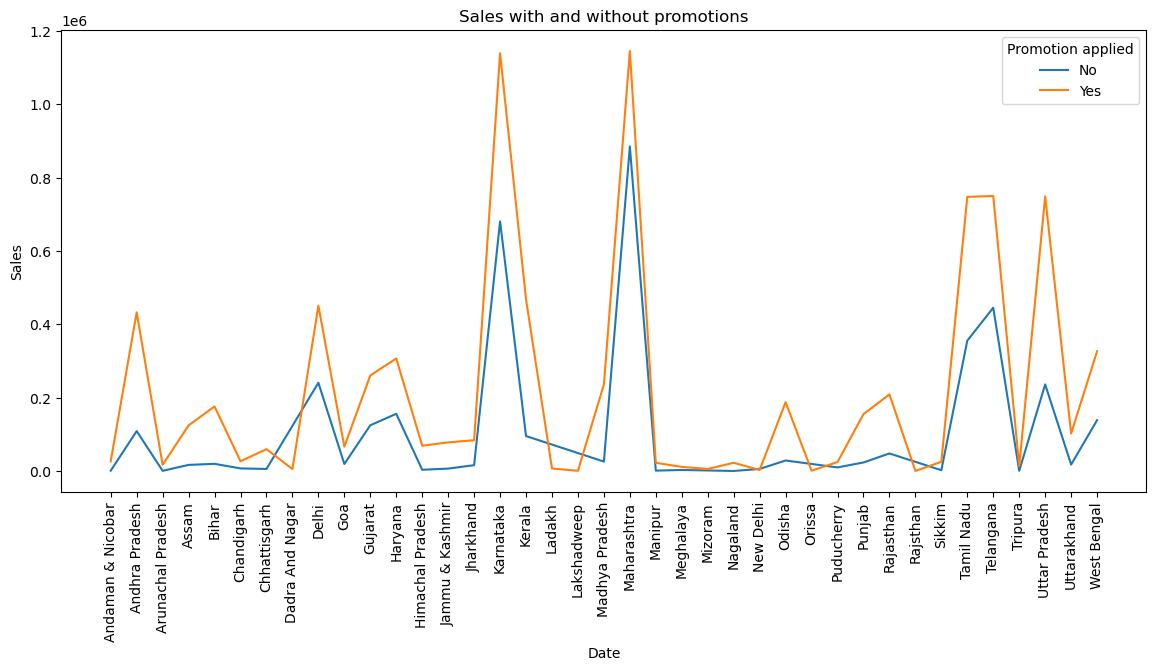

In [39]:
plt.figure(figsize=(14, 6))
new_df = df.groupby(['Ship State', 'Promotion applied'])['Amount'].sum().reset_index()

sns.lineplot(data=new_df, x='Ship State', y='Amount', hue='Promotion applied',errorbar=None)

plt.title('Sales with and without promotions')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Sales')
plt.show()

Comparison in Sales when order is fulfilled by Amazon vs Merchant.
Inference: Sales from Amazon is atleast double than that of Merchant.

In [40]:
df_grouped = df.groupby(['Date','Fulfilment','Ship Service Level','Status','Promotion applied'])['Amount'].sum().reset_index()
df_grouped['Date'] = df_grouped['Date'].dt.date

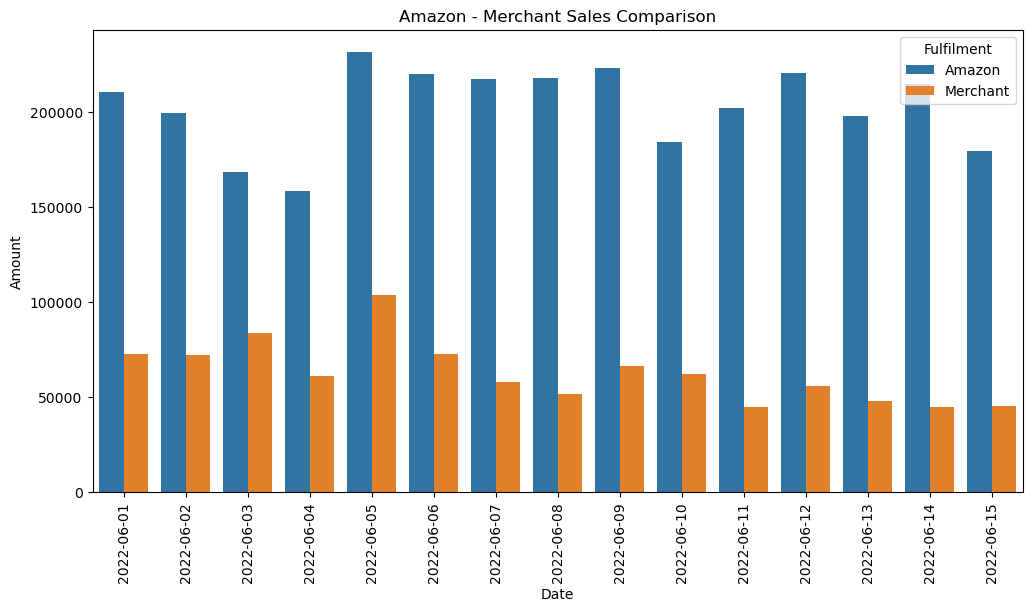

In [41]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Date', y='Amount', hue='Fulfilment', data=df_grouped, errorbar=None)
plt.title('Amazon - Merchant Sales Comparison')
plt.xticks(rotation=90)
plt.show()

Compare the products that are being returned.

Insight: Sarees and sets seem to be the items that are returned most. Bottoms is the most least returned item. Also, noted that all return order were originally sold by Merchants and not Amazon.

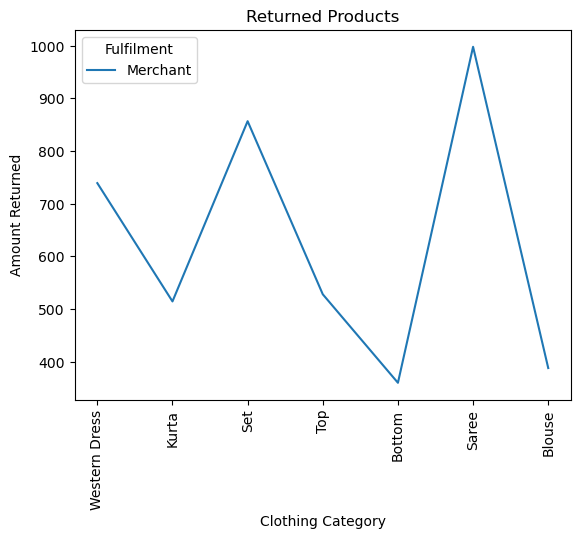

In [42]:
# Condition: Products returned
df_grouped = df.groupby(['Category','Fulfilment','Ship Service Level','Status','Promotion applied'])['Amount'].sum().reset_index()
selected_values = ['Shipped - Returned to Seller', 'Shipped - Returning to Seller']

# Create a new DataFrame containing only rows with selected values
df_returned = df[df['Status'].isin(selected_values)]
#print(df_returned)
sns.lineplot(data=df_returned, x='Category', y='Amount', hue='Fulfilment',errorbar=None)

plt.title('Returned Products')
plt.xlabel('Clothing Category')
plt.xticks(rotation=90)
plt.ylabel('Amount Returned')
plt.show()

Scatter plot to find the correlation between Quantity and Amount.
Insight: While amount may increase at times with quantity, overall, there is no clear linear correlation between quantity and amount.

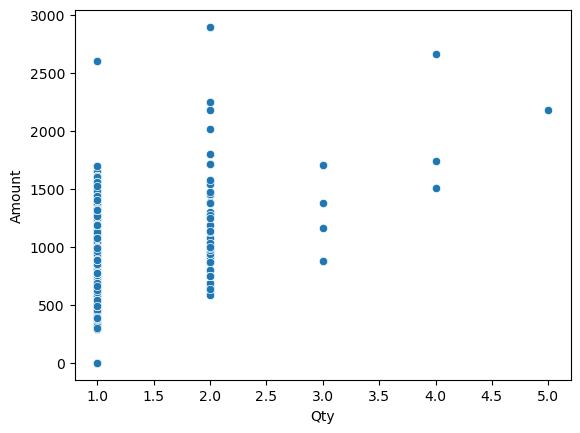

In [43]:
sns.scatterplot(data=df, x="Qty", y="Amount")
plt.show()

#Heat map to find correlation between numerical/boolean values like Quantity, Amount and B2B.
Insight:This result supports what was observed in the scatterplot. That is, Quantity and Amount independent, and B2B status is not related to either of the other variables.

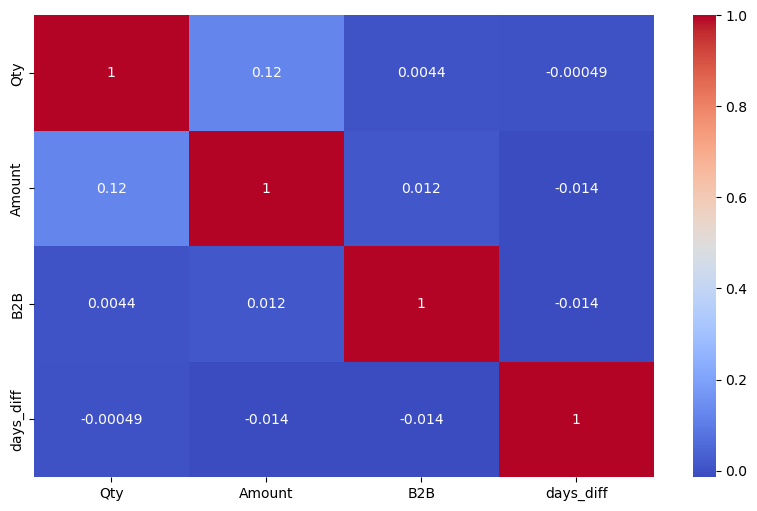

In [44]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

# Overall Project Summary
An in-depth look at the profitability of e-commerce sales in Amazon in the month of June. 
Using this dataset, one can measure the performance of their campaigns more accurately and efficiently.

Insights:

- Sales insights:
    The sales tends to average at around Rs.818000, however it must be noted that that the sales 
    takes significant dips on Fridays but picks up over the weekends.
    Sales are higher when promotion offers are available as expected.
    
- Geographic insights:
    Bengaluru and Hyderabad are the cities with stellar sales,however, they contribute to only 18% of the total sales.
    Maharashtra tops the list of the states with top sales followed by Karnataka, even though Bengaluru has top sales citywise.
    
- Expenditure trend:
    Customers tend to usually spend in the range of Rs. 450 and Rs.750 approx per order. 
    30% of the orders were above said range.
    Top 3 selling products are Kurtas, Set and Western Dresses. They contribute to 91% of the total sales.
    
- Delivery issues and Return rates:    
    77% of the orders are yet to be delivered and are in transit, 
    36% of orders have failed to meet the delivery deadline, this warrants further analysis. 
    22% of the orders have been delivered. 
    Approximately 1% is being returned to seller.
    Sarees and sets seem to be the items that are returned most. Bottoms is the most least returned item. 
    
- Order Fulfilment Pattern:
    Sales from Amazon is atleast double than that of Merchant.
    All return orders were originally sold by Merchants and not Amazon.

- Correlation:
    While amount may increase at times with quantity, overall, there is no linear correlation between quantity and amount.
    Scatterplot and Heat map confirms the same inference.